<a href="https://colab.research.google.com/github/lattehauma/-/blob/main/%5B%EB%B6%80%EC%8A%A4%ED%8A%B8%EC%BD%94%EC%8A%A4%EC%97%B0%EC%8A%B5%5Dbike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lattsou","key":"835050ace4bab70461be674574925654"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s bike-sharing-demand

ref                                                              title                                               size  lastUpdated          downloadCount  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
saurabhshahane/seoul-bike-sharing-demand-prediction              Seoul Bike Sharing Demand Prediction               126KB  2021-02-26 15:59:52            424  
lakshmi25npathi/bike-sharing-dataset                             Bike Sharing Dataset                               286KB  2019-03-03 18:14:35           2170  
karansehgal30/bike-sharing-analysis-post-covid19                 Bike Sharing Demand Analysis                        21KB  2020-08-07 05:43:23            105  
abdullapathan/bikesharingdemand                                  bike-sharing-demand                                189KB  2020-11-19 15:54:45             69  
shaghayeghhadian/bike-sharing-demand    

In [3]:
!kaggle competitions download -c bike-sharing-demand

  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 40.6MB/s]
  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 42.0MB/s]
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 76.9MB/s]


In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         76           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        116           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        848           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        172           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1832           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14045           False  
house-pr

In [ ]:
!kaggle competitions download -c bike-sharing-demand

  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 55.8MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 55.2MB/s]
  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 53.2MB/s]


In [4]:
!ls

kaggle.json  sample_data  sampleSubmission.csv	test.csv  train.csv


# Bike Sharing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

plt.style.use('ggplot')
#plt의 보이는 스타일 중 하나 https://blog.daum.net/buillee/1558 참고

#마이너스 폰트 문제의 해결
mpl.rcParams['axes.unicode_minus']=False

In [6]:
train = pd.read_csv("/content/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [28]:
test=pd.read_csv('/content/test.csv', parse_dates=["datetime"])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

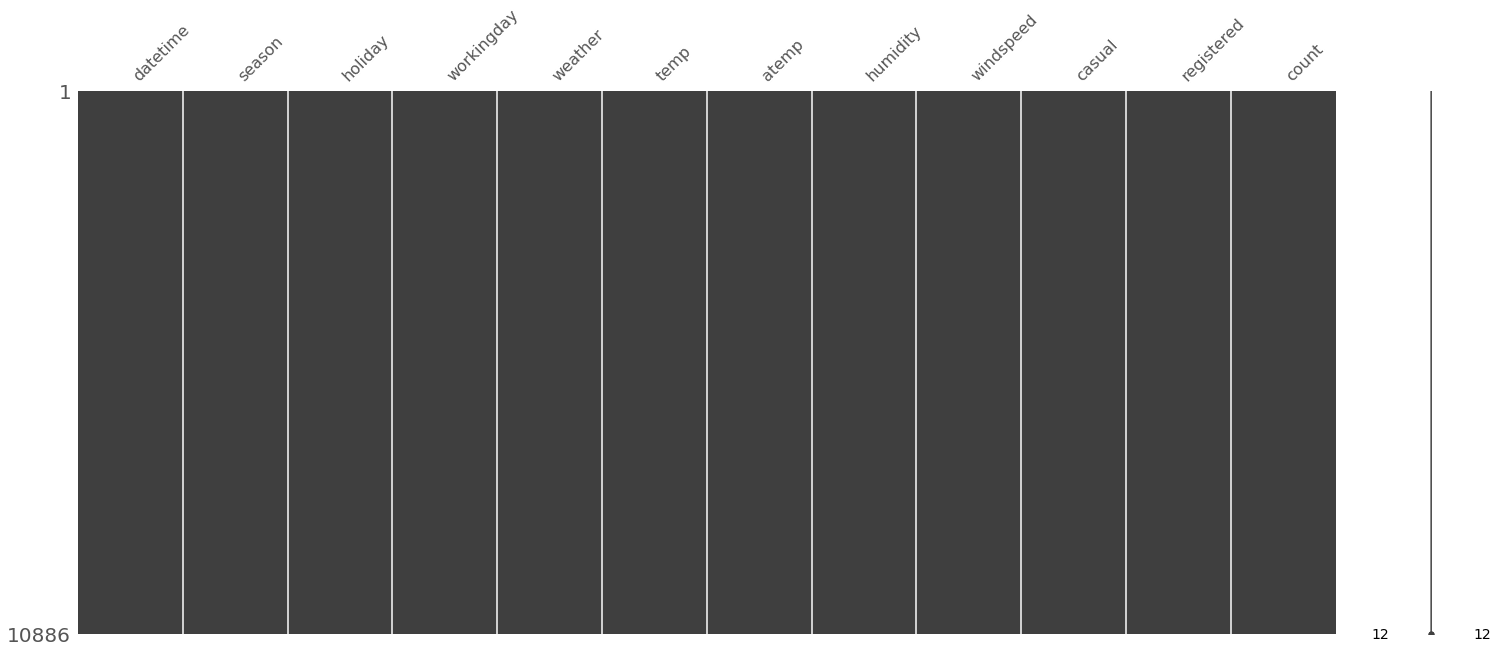

In [ ]:
##결측값 시각화

import missingno as msno
msno.matrix(train)

#null데이터가 없는 것으로 보임

In [26]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape


(10886, 18)

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'hour'), Text(0.5, 1.0, 'Time rent')]

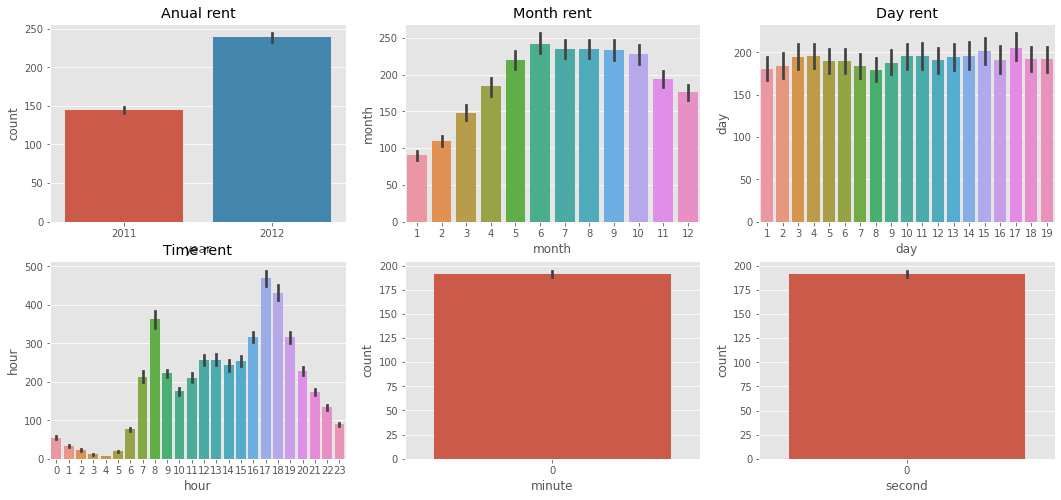

In [ ]:
##그래프 다양하게 작성하는 방법1


figure, ((ax1, ax2, ax3), (ax4, ax5, ax6))=plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y='count', ax=ax1)
sns.barplot(data=train, x="month", y='count', ax=ax2)
sns.barplot(data=train, x="day", y='count', ax=ax3)
sns.barplot(data=train, x="hour", y='count', ax=ax4)
sns.barplot(data=train, x="minute", y='count', ax=ax5)
sns.barplot(data=train, x="second", y='count', ax=ax6)

ax1.set(ylabel='count', title="Anual rent")
ax2.set(ylabel='month', title="Month rent")
ax3.set(ylabel='day', title="Day rent")
ax4.set(ylabel='hour', title="Time rent")

[Text(0, 0.5, 'count'), Text(0.5, 0, 'Season'), Text(0.5, 1.0, 'workday rent')]

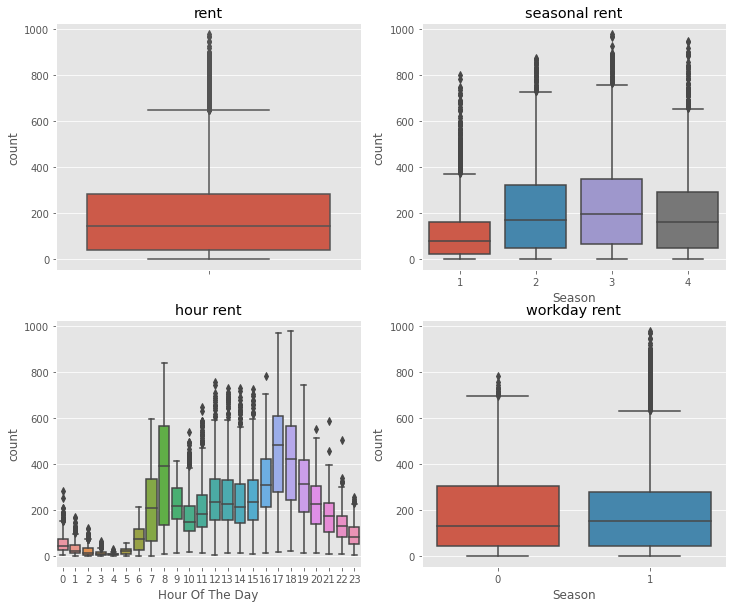

In [ ]:
##그래프 다양하게 작성하는 방법2

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train, y='count', orient="v", ax=axes[0][0])
sns.boxplot(data=train, y='count', x='season',orient="v", ax=axes[0][1])
sns.boxplot(data=train, y='count', x='hour',orient="v", ax=axes[1][0])
sns.boxplot(data=train, y='count', x='workingday',orient="v", ax=axes[1][1])
#orient v: 세로방향으로 그래프를 작성

axes[0][0].set(ylabel='count', title='rent')
axes[0][1].set(xlabel='Season', ylabel='count', title='seasonal rent')
axes[1][0].set(xlabel='Hour Of The Day', ylabel='count', title='hour rent')
axes[1][1].set(xlabel='Season', ylabel='count', title='workday rent')

In [ ]:
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape
#dayofweek: 월요일이 0

(10886, 19)

In [ ]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

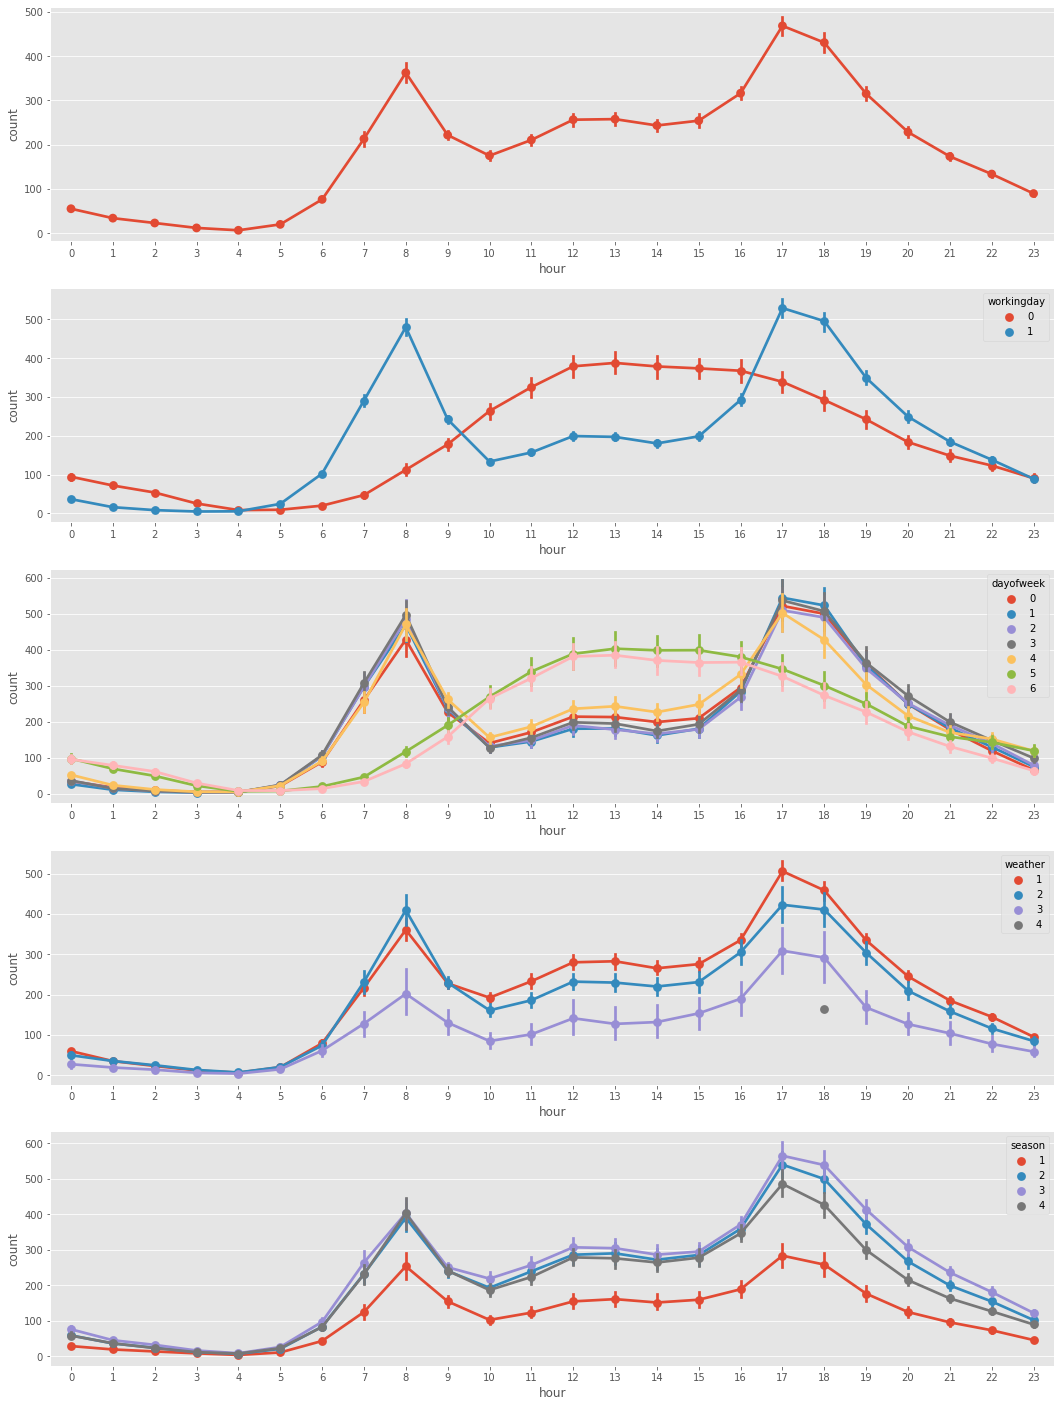

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5)=plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

In [ ]:
corrMatt=train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt=corrMatt.corr()
print(corrMatt)

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


In [ ]:
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False  #하삼각형만 추출하는 함수

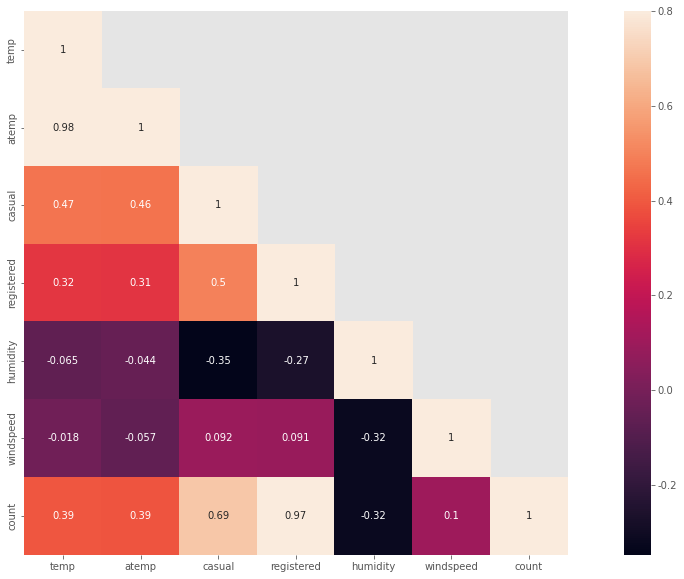

In [ ]:
fig, ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)
#square:정사각형으로 설정함

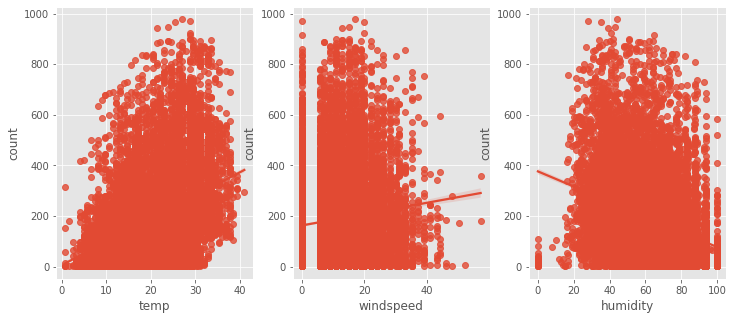

In [ ]:
fig, (ax1, ax2, ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp', y='count', data=train, ax=ax1)
sns.regplot(x='windspeed', y='count', data=train, ax=ax2)
sns.regplot(x='humidity', y='count', data=train, ax=ax3)

In [ ]:
def concatenate_year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month']=train['datetime'].apply(concatenate_year_month)

print(train.shape)


(10886, 20)


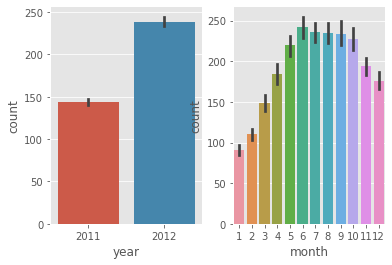

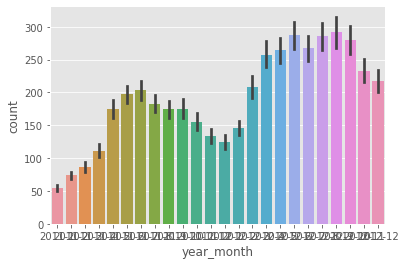

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

sns.barplot(data=train, x='year',y='count', ax=ax1)
sns.barplot(data=train, x='month',y='count', ax=ax2)

fig, ax3 =plt.subplots(nrows=1, ncols=1)
sns.barplot(data=train, x='year_month', y='count', ax=ax3)

In [8]:
two=train[np.abs(train['count']-train['count'].mean()) <= (3*train['count']) ]

In [18]:
print(two)

                 datetime  season  holiday  ...  casual  registered  count
11    2011-01-01 11:00:00       1        0  ...      26          30     56
12    2011-01-01 12:00:00       1        0  ...      29          55     84
13    2011-01-01 13:00:00       1        0  ...      47          47     94
14    2011-01-01 14:00:00       1        0  ...      35          71    106
15    2011-01-01 15:00:00       1        0  ...      40          70    110
...                   ...     ...      ...  ...     ...         ...    ...
10881 2012-12-19 19:00:00       4        0  ...       7         329    336
10882 2012-12-19 20:00:00       4        0  ...      10         231    241
10883 2012-12-19 21:00:00       4        0  ...       4         164    168
10884 2012-12-19 22:00:00       4        0  ...      12         117    129
10885 2012-12-19 23:00:00       4        0  ...       4          84     88

[8001 rows x 12 columns]


In [20]:
print(train.shape)
print(two.shape)

(10886, 12)
(8001, 12)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.75512118, -3.52683847, -3.40136165, ...,  3.40136165,
          3.52683847,  3.75512118]),
  array([3.8918203 , 3.8918203 , 3.8918203 , ..., 6.87626461, 6.87832647,
         6.88550967])),
 (0.6811413933668111, 5.319241302387579, 0.9926479860119485))

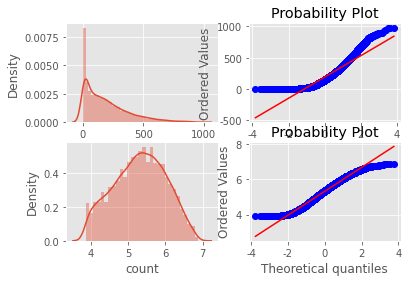

In [17]:
figure.set_size_inches(12,10)
figure, axes=plt.subplots(ncols=2, nrows=2)

sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(two['count']), ax=axes[1][0])
stats.probplot(np.log1p(two['count']), dist='norm', fit=True, plot=axes[1][1])


##사이킷런 연습
deision tree(결정 트리)

In [22]:
from sklearn.metrics import make_scorer

def rmsle(y, acty):
  y=np.array(y)
  acty=np.array(acty)
  dif=np.square(np.log(y+1)-np.log(acty+1))
  fin=np.sqrt(dif.mean())

  return fin

In [25]:
train.head()
print(train.shape)

(10886, 12)


In [27]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape


(10886, 19)

In [29]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour
test['minute']=test['datetime'].dt.minute
test['second']=test['datetime'].dt.second
test['dayofweek']=test['datetime'].dt.dayofweek
test.shape


(6493, 16)

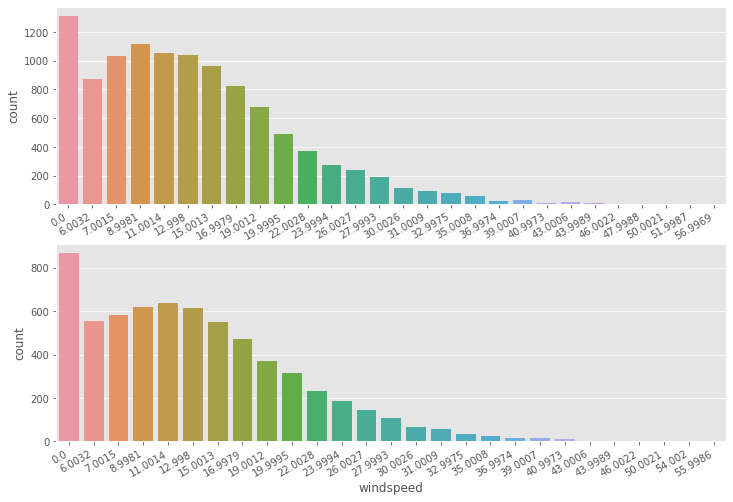

In [38]:
fig, axes=plt.subplots(nrows=2)
fig.set_size_inches(12,8)

plt.sca(axes[0])
#현재 Axes를 ax로 설정하고 현재 Figure를 ax 부모로 설정 합니다. -> 설정해줘야 아래 함수가 먹히는 경우가...있는듯
plt.xticks(rotation=30, ha='right')
sns.countplot(data=train, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
sns.countplot(data=test, x='windspeed', ax=axes[1])

0데이터 값을 처리하는 방법

In [41]:
#머신러닝으로 풍속 예측해서 넣어주기

from sklearn.ensemble import RandomForestClassifier

def prewind(data):
  wind0=data.loc[data['windspeed']==0]
  windnot0=data.loc[data['windspeed']!=0]

  #피쳐선택하기
  wcol=['season', 'weather','humidity','month','temp','year','atemp']
  #스트링으로 변환은 왜 해주는거지??? 
  windnot0['windspeed']=windnot0['windspeed'].astype('str')

  #모델먼저 설정해주고...
  model1=RandomForestClassifier()
  #핏 -> 예측하는거
  model1.fit(windnot0[wcol], windnot0['windspeed'])
  val=model1.predict(X = wind0[wcol])

  prewind0=wind0
  prewindnot0=windnot0

  prewind0['windspeed']=val

  data=prewindnot0.append(prewind0)
  data['windspeed']=data['windspeed'].astype('float')

  data.reset_index(inplace=True)
  data.drop('index', inplace=True, axis=1)

  return data



In [42]:
train=prewind(train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


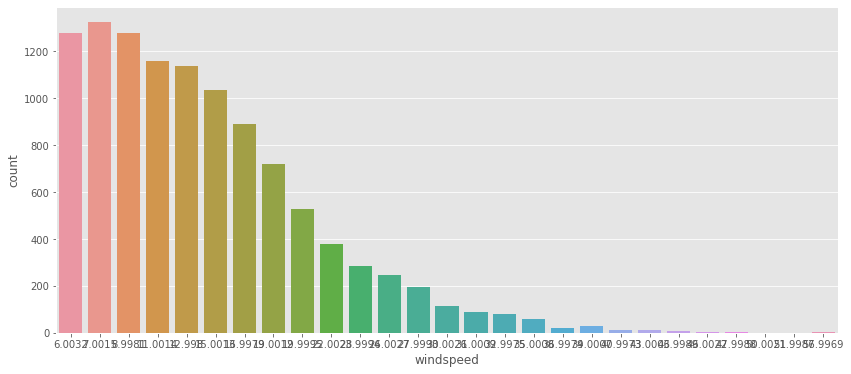

In [46]:
plt.figure(figsize=(14,6))
sns.countplot(data=train, x='windspeed')

Feature Selection

* 피쳐를 선택하는 과정. 하나씩 추가하면서 체크하는 것이 좋음
* 범주형과 연속형을 구분해줘야한다. 범주형의 타입은 카테고리로 변경해줌

In [47]:
feature=['season','holiday','workingday','weather',
         'dayofweek','month','year','hour']
  
for var in feature:
  train[var]=train[var].astype('category')
  test[var]=test[var].astype('category')

In [48]:
feature=['season','holiday','workingday','weather',
         'dayofweek','year','hour',
         'temp','atemp','humidity','windspeed']

In [49]:
x_train=train[feature]
x_train.head()

,season,holiday,workingday,weather,dayofweek,year,hour,temp,atemp,humidity,windspeed
0,1,0,0,2,5,2011,5,9.84,12.880,75,6.0032
1,1,0,0,1,5,2011,10,15.58,19.695,76,16.9979
2,1,0,0,1,5,2011,11,14.76,16.665,81,19.0012
3,1,0,0,1,5,2011,12,17.22,21.210,77,19.0012
4,1,0,0,2,5,2011,13,18.86,22.725,72,19.9995


In [50]:
x_test=test[feature]

In [51]:
label='count'
y_train=train[label]
y_train.head(5)

0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

In [53]:
rmsle_scorer=make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

**KFold 방식의 교차검증**

비슷한 크기의 부분집합(폴드)로 나누고 각 폴드의 정확도를 측정함.
훈련세트와 테스트 세트를 나누어서 각 분할마다 정확도를 측정하여 평균값을 계산한다.


In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

fold=KFold(n_splits=10, shuffle=True, random_state=0)

In [57]:
from sklearn.ensemble import RandomForestRegressor

max_list=[]
model=RandomForestRegressor(n_estimators=100,
                            n_jobs=-1,
                            random_state=0)
model

RandomForestRegressor(n_jobs=-1, random_state=0)

걸리는 시간을 측정해주는 기능

* 이거 뭐 어케 쓰는건데 모르겠다

In [70]:
score = cross_val_score(model,x_train, y_train, cv=fold, 
                             scoring=rmsle_scorer)
score=score.mean()



In [61]:
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [62]:
y=model.predict(x_test)

print(y.shape)
y[0:10]

(6493,)


array([ 12.25,   5.02,   4.15,   3.49,   3.07,   6.26,  38.14, 104.9 ,
       236.13, 135.61])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


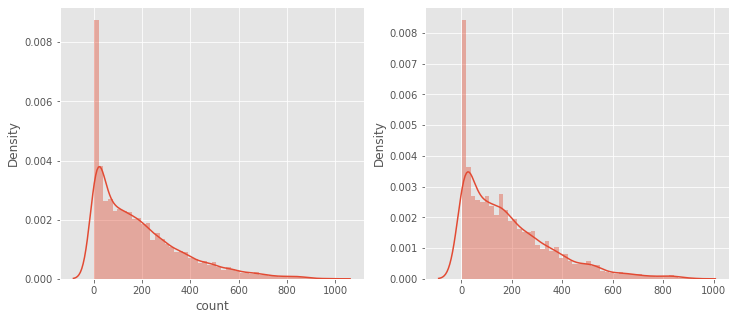

In [65]:
fig, axes =plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train, ax=axes[0], bins=50)
sns.distplot(y, ax=axes[1], bins=50)

sumit

In [66]:
 submission=pd.read_csv('/content/sampleSubmission.csv')
 submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [67]:
submission['count']=y
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.25
1,2011-01-20 01:00:00,5.02
2,2011-01-20 02:00:00,4.15
3,2011-01-20 03:00:00,3.49
4,2011-01-20 04:00:00,3.07


In [71]:
score

0.33046627137864265

**저장방법**
submission.to_csv('경로'.format(score), index=False)

## 다른 Regression을 이용한 적합 

In [75]:
train=pd.read_csv("/content/train.csv",parse_dates=['datetime'])
train.shape

(10886, 12)

In [76]:
test=pd.read_csv("/content/test.csv",parse_dates=['datetime'])
test.shape

(6493, 9)

In [77]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['hour']=train['datetime'].dt.hour
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 16)

In [78]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['hour']=test['datetime'].dt.hour
test['dayofweek']=test['datetime'].dt.dayofweek
test.shape

(6493, 13)

In [79]:
feature=['season','holiday','workingday','weather',
         'dayofweek','month','year','hour']
  
for var in feature:
  train[var]=train[var].astype('category')
  test[var]=test[var].astype('category')

In [80]:
feature=['season','holiday','workingday','weather',
         'dayofweek','year','hour',
         'temp','atemp','humidity']

In [ ]:
x_train=train[feature]
x_test=test[feature]
y_train=train['count']

선형회귀 모델(LRM)

In [83]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

model2=LinearRegression()

y_train_log=np.log1p(y_train)
model2.fit(x_train, y_train_log)

preds=model2.predict(x_train)
print(rmsle(np.exp(y_train_log), np.exp(preds)))

0.9799067619616967


릿지 Regularization Model(Ridge)
* 가중치의 모든 원소가 0에 가깝게 만들어 모든 피처가 주는 영향을 최소화 함

In [88]:
rm=Ridge()
rpara={
    'max_iter':[4000], #반복하는 최대 횟수
    'alpha':[0.01,0.1,1,2,3,4,10,30,100,200,300,400,800,1000]
}
rmsle_scorer=metrics.make_scorer(rmsle, greater_is_better=False)
gm=GridSearchCV(rm, rpara, scoring=rmsle_scorer, cv=5)

In [89]:
gm.fit(x_train,y_train_log)
preds=gm.predict(x_train)

In [90]:
print(rmsle(np.exp(y_train_log),np.exp(preds)))

0.9799067599510987


라쏘 Regularization Model(Lasso)
* 선형 회귀에 규제를 적용하는 대안 L1규제라고 하기도 함 

In [93]:
modella=Lasso()
alpha=1/np.array([0.1,1,2,3,4,10,30,100,200,300,400,800,900,1000])
lapara={
    'max_iter':[3000],'alpha':alpha
}

glasso=GridSearchCV(modella, lapara, scoring=rmsle_scorer, cv=5)
glasso.fit(x_train, y_train_log)
preds=glasso.predict(x_train)
print(rmsle(np.exp(y_train_log),np.exp(preds)))

0.9799159573241629


##앙상블 모델 - 랜덤 포레스트

In [95]:
from sklearn.ensemble import RandomForestRegressor
rfModel=RandomForestRegressor(n_estimators=100)

rfModel.fit(x_train, y_train_log)

preds=rfModel.predict(x_train)
print(rmsle(np.exp(y_train_log),np.exp(preds)))

0.10665130915047728


## 앙상블 모델 - 그라디언트 부스트
* 여러개의 결정트리를 묶는 방법
* 회귀와 분류에 모두 사용할 수 있음
* 메모리가 적고 예측이 빠름

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=400, alpha=0.01)

gbm.fit(x_train, y_train_log)
preds=gbm.predict(x_train)
score=rmsle(np.exp(y_train_log),np.exp(preds))
print(score)

0.26411729491085834


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


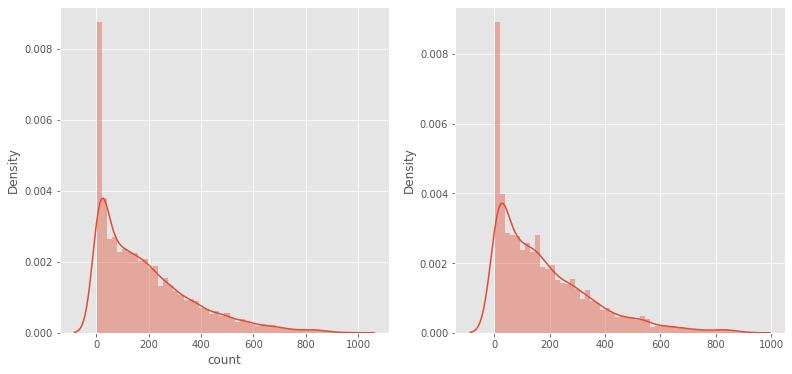

In [100]:
predstest=rfModel.predict(x_test)
fig, axes=plt.subplots(ncols=2)
fig.set_size_inches(13,6)
sns.distplot(y_train, bins=50, ax=axes[0])
sns.distplot(np.exp(predstest), bins=50, ax=axes[1])

In [101]:
 submission=pd.read_csv('/content/sampleSubmission.csv')
 submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [102]:
submission['count']=np.exp(predstest)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.393297
1,2011-01-20 01:00:00,6.030288
2,2011-01-20 02:00:00,4.188657
3,2011-01-20 03:00:00,4.400423
4,2011-01-20 04:00:00,3.968751
